Where to save results to

In [1]:
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/datasets/AtrophyMapping_Controls/stats_no_thresh'

# 01 - Load Controls

In [2]:
root = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/datasets/AtrophyMapping_Controls/cat12_mwp_processed'
gm = '*mwp1*resampled*'
wm = '*mwp2*resampled*'
csf = '*mwp3*resampled*'

In [3]:
from calvin_utils.vbm_utils.loading import import_segments
ctrl_dict = import_segments(root, gm, wm, csf)

I will search:  /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/datasets/AtrophyMapping_Controls/cat12_mwp_processed/*mwp1*resampled*


/Users/cu135/Software_Local/VBM/.vbm_venv/lib/python3.10/site-packages/calvin_utils/file_utils/import_matrices.py:83: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  matrix_df[name] = image.load_img(file).get_fdata().flatten()
/Users/cu135/Software_Local/VBM/.vbm_venv/lib/python3.10/site-packages/calvin_utils/file_utils/import_matrices.py:83: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  matrix_df[name] = image.load_img(file).get_fdata().flatten()
/Users/cu135/Software_Local/VBM/.vbm_venv/lib/python3.10/site-packages/calvin_utils/

Imported grey_matter: 902629 voxels, 136 patients
Example subject filename: mwp1070_S_4856_resampled.nii
--------------------------------
I will search:  /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/datasets/AtrophyMapping_Controls/cat12_mwp_processed/*mwp2*resampled*


/Users/cu135/Software_Local/VBM/.vbm_venv/lib/python3.10/site-packages/calvin_utils/file_utils/import_matrices.py:83: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  matrix_df[name] = image.load_img(file).get_fdata().flatten()
/Users/cu135/Software_Local/VBM/.vbm_venv/lib/python3.10/site-packages/calvin_utils/file_utils/import_matrices.py:83: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  matrix_df[name] = image.load_img(file).get_fdata().flatten()
/Users/cu135/Software_Local/VBM/.vbm_venv/lib/python3.10/site-packages/calvin_utils/

Imported white_matter: 902629 voxels, 136 patients
Example subject filename: mwp2033_S_4177_resampled.nii
--------------------------------
I will search:  /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/datasets/AtrophyMapping_Controls/cat12_mwp_processed/*mwp3*resampled*


/Users/cu135/Software_Local/VBM/.vbm_venv/lib/python3.10/site-packages/calvin_utils/file_utils/import_matrices.py:83: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  matrix_df[name] = image.load_img(file).get_fdata().flatten()
/Users/cu135/Software_Local/VBM/.vbm_venv/lib/python3.10/site-packages/calvin_utils/file_utils/import_matrices.py:83: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  matrix_df[name] = image.load_img(file).get_fdata().flatten()
/Users/cu135/Software_Local/VBM/.vbm_venv/lib/python3.10/site-packages/calvin_utils/

Imported cerebrospinal_fluid: 902629 voxels, 136 patients
Example subject filename: mwp3116_S_4483_resampled.nii
--------------------------------


/Users/cu135/Software_Local/VBM/.vbm_venv/lib/python3.10/site-packages/calvin_utils/file_utils/import_matrices.py:83: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  matrix_df[name] = image.load_img(file).get_fdata().flatten()
/Users/cu135/Software_Local/VBM/.vbm_venv/lib/python3.10/site-packages/calvin_utils/file_utils/import_matrices.py:83: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  matrix_df[name] = image.load_img(file).get_fdata().flatten()
/Users/cu135/Software_Local/VBM/.vbm_venv/lib/python3.10/site-packages/calvin_utils/

# Generate Z-Scored Atrophy Maps for Each Segment

In [4]:
from calvin_utils.vbm_utils.processing import process_atrophy
atrophy, _, stats = process_atrophy(ctrl_dict, ctrl_dict)

In [5]:
import os 
current_dir = os.path.dirname(os.path.abspath(os.getcwd()))
mask = os.path.join(current_dir, 'rois', 'MNI152_T1_2mm_brain_mask.nii')

In [6]:
from calvin_utils.nifti_utils.generate_nifti import view_and_save_nifti
for tissue in stats.keys():  
    view_and_save_nifti(stats[tissue][0], out_dir=out_dir, output_name=f'{tissue}_mean', silent=False, ref_file=mask)
    view_and_save_nifti(stats[tissue][1], out_dir=out_dir, output_name=f'{tissue}_std', silent=False, ref_file=mask)

Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/datasets/AtrophyMapping_Controls/stats_no_thresh
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/datasets/AtrophyMapping_Controls/stats_no_thresh
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/datasets/AtrophyMapping_Controls/stats_no_thresh
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/datasets/AtrophyMapping_Controls/stats_no_thresh
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/datasets/AtrophyMapping_Controls/stats_no_thresh
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/datasets/AtrophyMapping_Controls/stats_no_thresh


# Generate H-Scored (Composite) Atrophy Maps

In [7]:
from calvin_utils.vbm_utils.composite_atrophy_mapper import generate_norm_map
h, mean, std = generate_norm_map(atrophy, atrophy)

Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/datasets/AtrophyMapping_Controls/stats_no_thresh



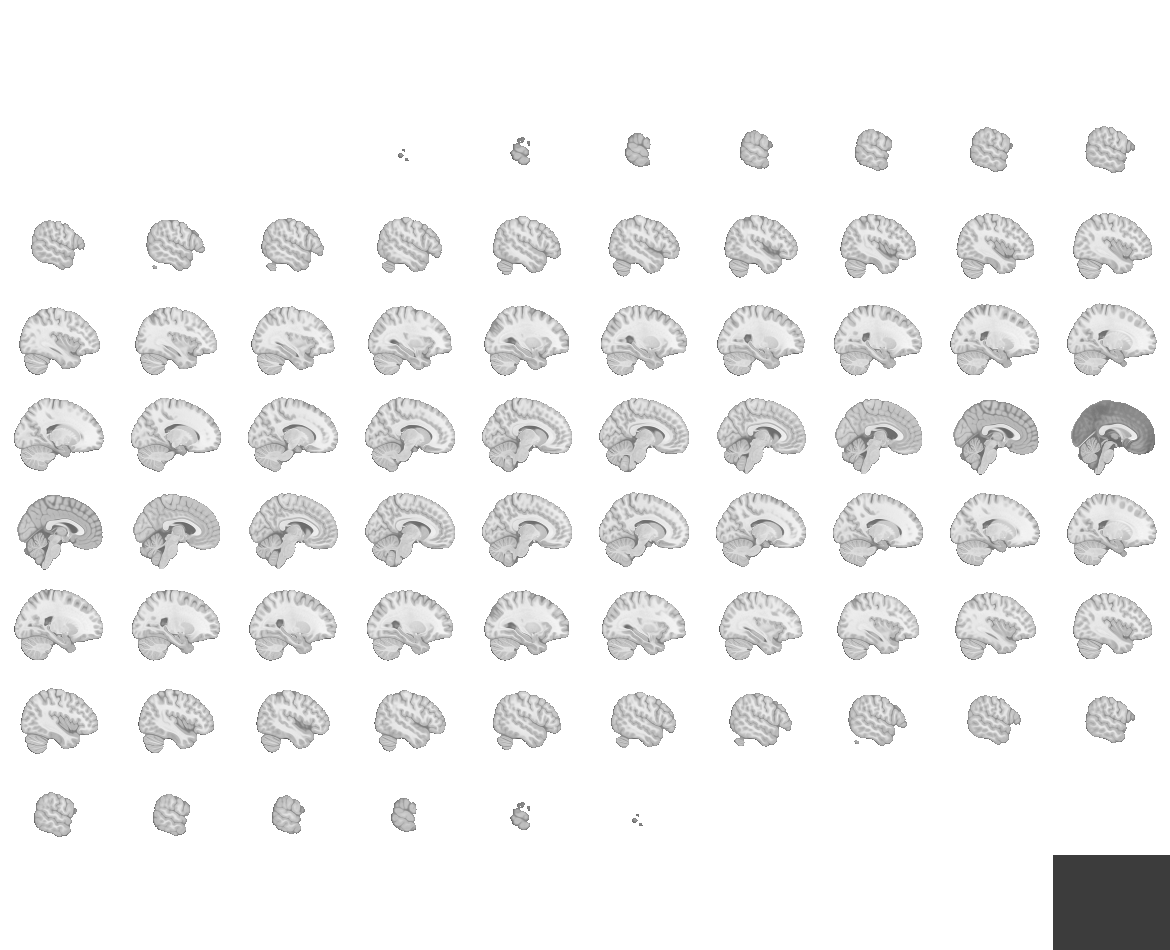
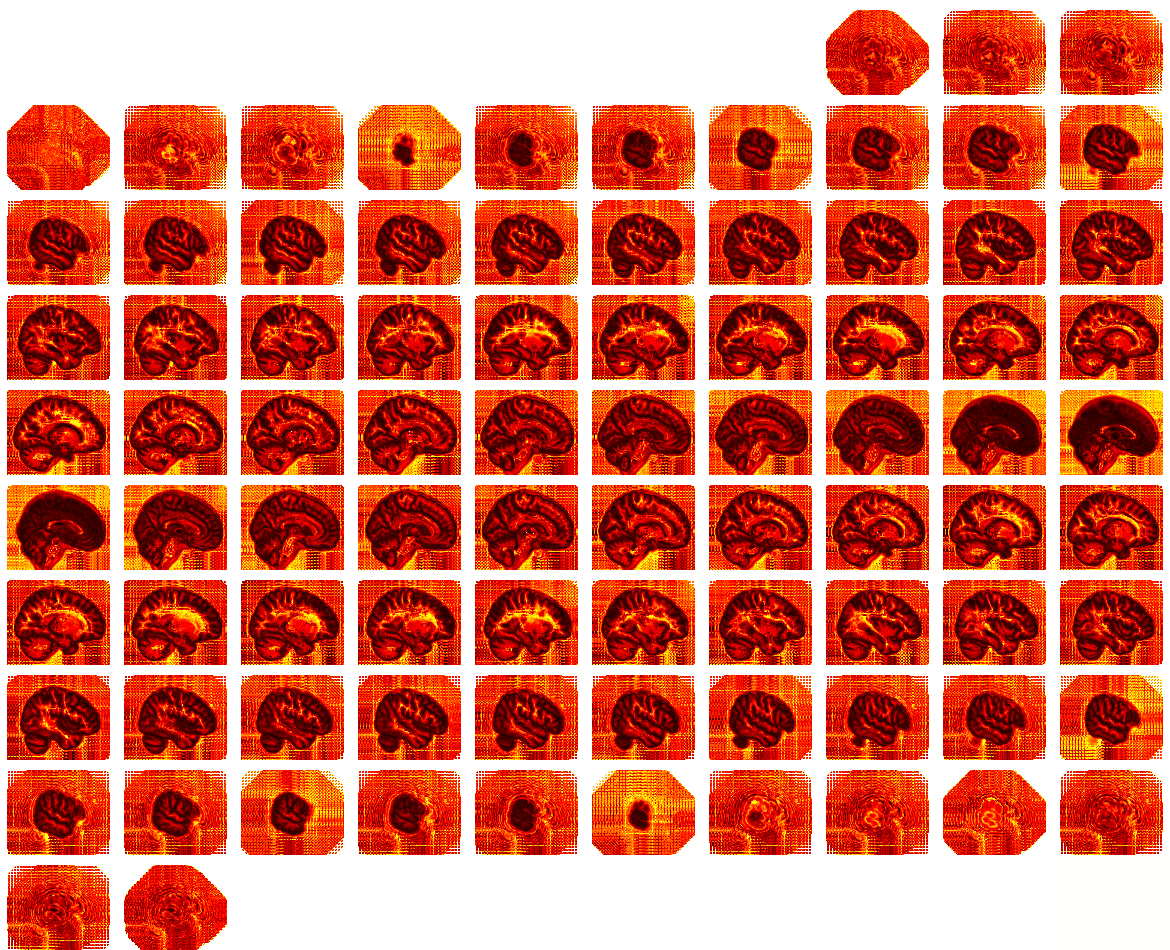

In [8]:
from calvin_utils.nifti_utils.generate_nifti import view_and_save_nifti
view_and_save_nifti(mean, out_dir=out_dir, output_name='norm_mean', silent=False, ref_file=mask)

Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/datasets/AtrophyMapping_Controls/stats_no_thresh



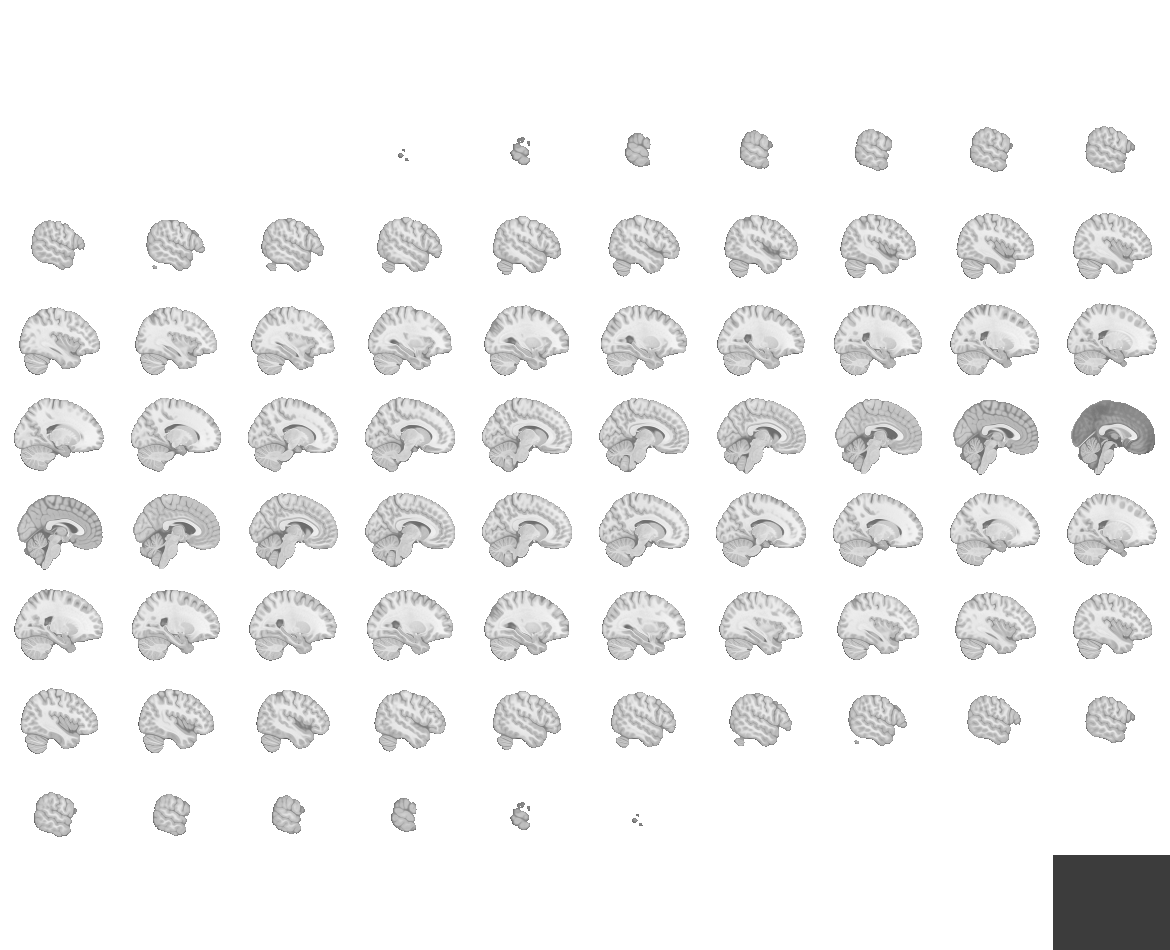
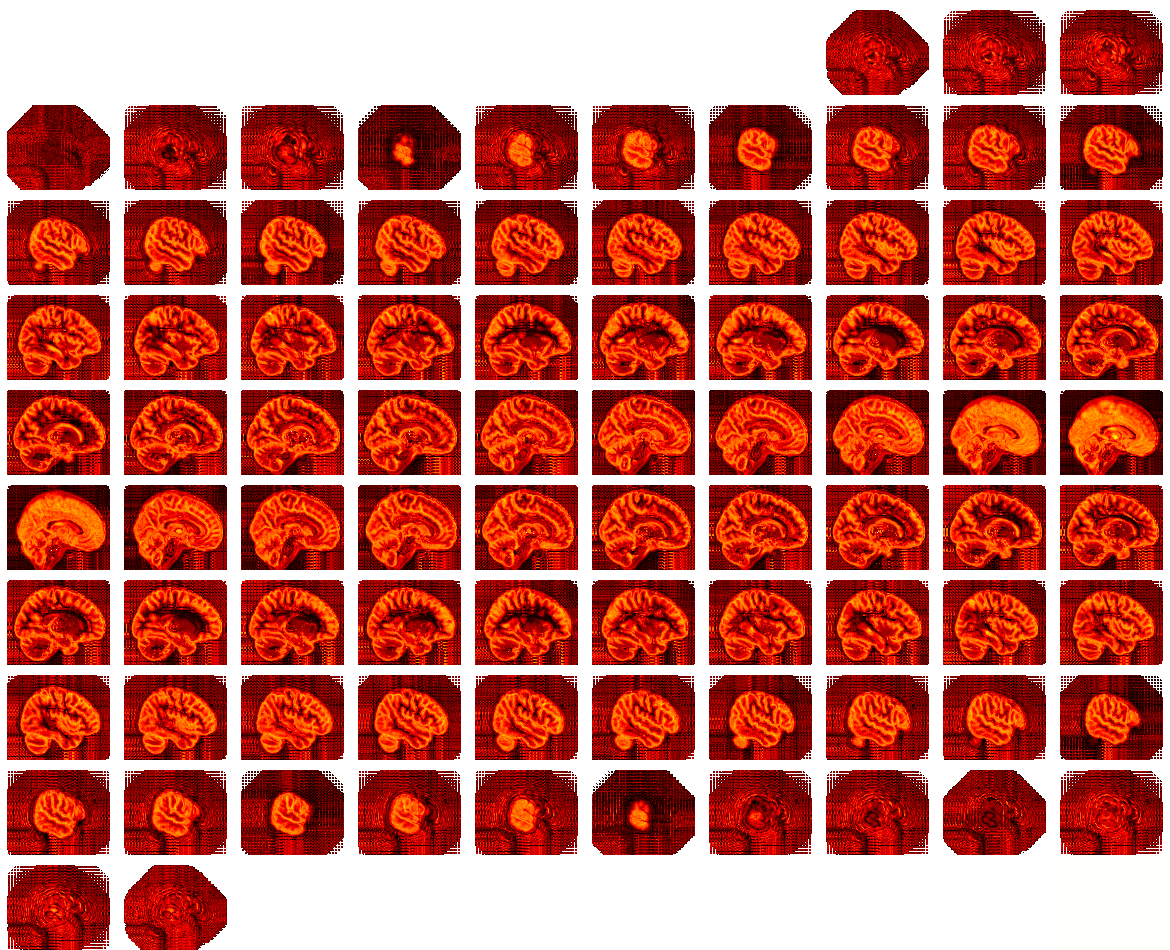

In [9]:
from calvin_utils.nifti_utils.generate_nifti import view_and_save_nifti
view_and_save_nifti(std, out_dir=out_dir, output_name='norm_std', silent=False, ref_file=mask)

All Done. Enjoy your atrophy seeds.

--Calvin